In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
%pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17430, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 17430 (delta 73), reused 28 (delta 26), pack-reused 17327 (from 4)
Receiving objects: 100% (17430/17430), 16.31 MiB | 17.20 MiB/s, done.
Resolving deltas: 100% (11944/11944), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.6 MB

A diferencia del yolov3 y yolov4 que se cargaban manualmente las direcciones, en este caso solo es necesario crear un archivo .yaml, en donde este contiene, el numero de clases, la etiqueta y las direcciones de los archivos.

La estrcutra esperada para los archivos para los entrenamientos es la siguiente:

  dataset

---


    --train
      --images
      --label
    --val
      --images
      --label

In [ ]:
data_yaml = """
train: /content/drive/MyDrive/INVESTIGACIÓN UAM/ESTACIÓN DE MONITOREO/dataset/train/images
val: /content/drive/MyDrive/INVESTIGACIÓN UAM/ESTACIÓN DE MONITOREO/dataset/val/images

nc: 1  # ← Cambia esto por el número de clases reales
names: ["0"]  # ← Cambia esto por tus clases
"""

with open('/content/yolov5/data.yaml', 'w') as f:
    f.write(data_yaml)

In [ ]:
!cat /content/yolov5/data.yaml


train: /content/drive/MyDrive/INVESTIGACIÓN UAM/ESTACIÓN DE MONITOREO/dataset/train/images
val: /content/drive/MyDrive/INVESTIGACIÓN UAM/ESTACIÓN DE MONITOREO/dataset/val/images 

nc: 1  # ← Cambia esto por el número de clases reales
names: ["0"]  # ← Cambia esto por tus clases


In [ ]:
!python train.py --img 640 --batch 64 --epochs 50 --data /content/yolov5/data.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt --name entrenamiento_drive

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-05-08 13:37:03.101372: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746711423.122615    2930 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746711423.129066    2930 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

In [ ]:
!python detect.py --weights runs/train/entrenamiento_drive/weights/best.pt --img 640 --conf 0.5 --source /content/video_39_frame_0000.jpg


detect: weights=['runs/train/entrenamiento_drive/weights/best.pt'], source=/content/video_39_frame_0000.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/video_39_frame_0000.jpg: 384x640 7 0s, 29.0ms
Speed: 0.5ms pre-process, 29.0ms inference, 148.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


In [ ]:
!ls runs/detect


exp  exp2


Se carga la imagen sin etiqueta para validar el funcionamiento del modelo (Se cambia la ruta por la imagen cargada)

In [ ]:
%cd /content/yolov5

# Realizar inferencia con tu modelo entrenado
!python detect.py --weights runs/train/entrenamiento_drive/weights/best.pt --img 640 --conf 0.5 --source /content/video_39_frame_0000.jpg


/content/yolov5
detect: weights=['runs/train/entrenamiento_drive/weights/best.pt'], source=/content/video_39_frame_0000.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/video_39_frame_0000.jpg: 384x640 7 0s, 27.3ms
Speed: 0.4ms pre-process, 27.3ms inference, 129.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


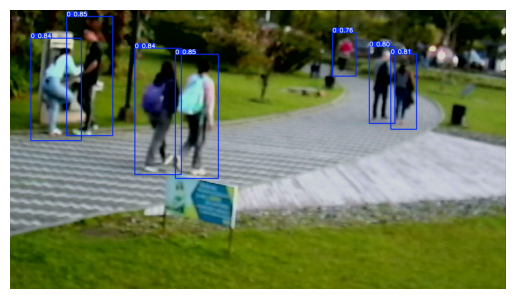

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/yolov5/runs/detect/exp/video_39_frame_0000.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
%cd /content/yolov5

# Realizar inferencia con tu modelo entrenado
!python detect.py --weights runs/train/entrenamiento_drive/weights/best.pt --img 640 --conf 0.5 --source /content/VÃ­deo_8_frame_0015.jpg

/content/yolov5
detect: weights=['runs/train/entrenamiento_drive/weights/best.pt'], source=/content/VÃ­deo_8_frame_0015.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/VÃ­deo_8_frame_0015.jpg: 384x640 7 0s, 28.0ms
Speed: 0.5ms pre-process, 28.0ms inference, 138.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


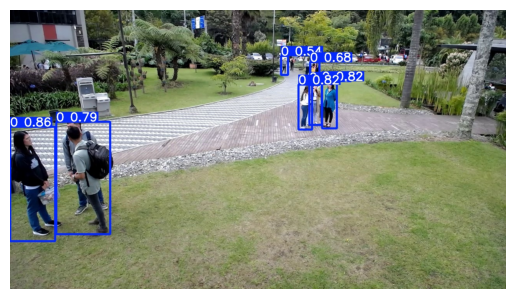

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/yolov5/runs/detect/exp3/VÃ­deo_8_frame_0015.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()
